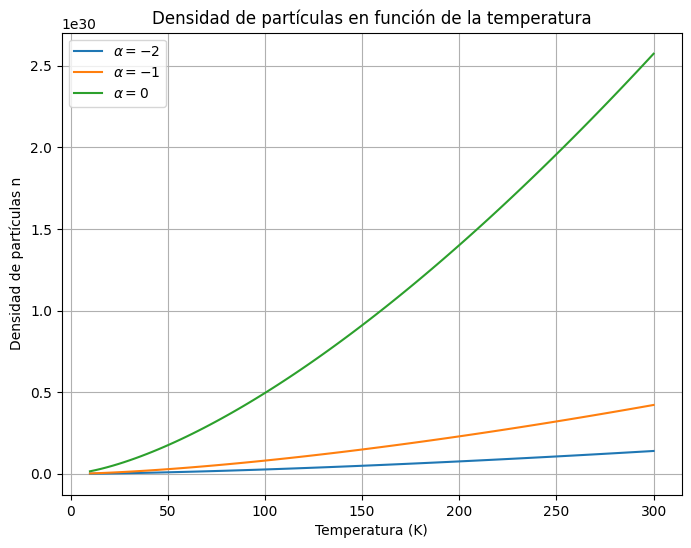

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constantes físicas (valores en unidades SI)
hbar = 1.0545718e-34  # Constante de Planck reducida (J·s)
kB = 1.380649e-23     # Constante de Boltzmann (J/K)
m = 1.67e-27          # Masa de una partícula (ejemplo: átomo de hidrógeno, kg)

# Función f(T) de la expresión dada
def f(T):
    return (1 / (2 * np.pi**2 * hbar**3)) * ((2 * m * kB * T)**(3/2)) / 2

# Función para calcular I(alpha)
def I(alpha):
    integral, _ = quad(lambda x: np.sqrt(x) / (np.exp(np.clip(x - alpha, -100, 100)) - 1), 0, np.inf)
    return integral

# Rango de temperaturas (en Kelvin)
T_values = np.linspace(10, 300, 100)  # De 10K a 300K

# Valores de alpha para comparar en la primera gráfica
alpha_values = [-2, -1, 0]

# Graficamos n = f(T) * I(alpha) para diferentes valores de alpha
plt.figure(figsize=(8, 6))
for alpha in alpha_values:
    n_values = [f(T) * I(alpha) for T in T_values]
    plt.plot(T_values, n_values, label=fr"$\alpha={alpha}$")

plt.xlabel("Temperatura (K)")
plt.ylabel("Densidad de partículas n")
plt.title("Densidad de partículas en función de la temperatura")
plt.legend()
plt.grid()
plt.show()


/tmp/ipython-input-2673978609.py:20: RuntimeWarning: overflow encountered in exp
  denom = np.exp(x - alpha) - 1


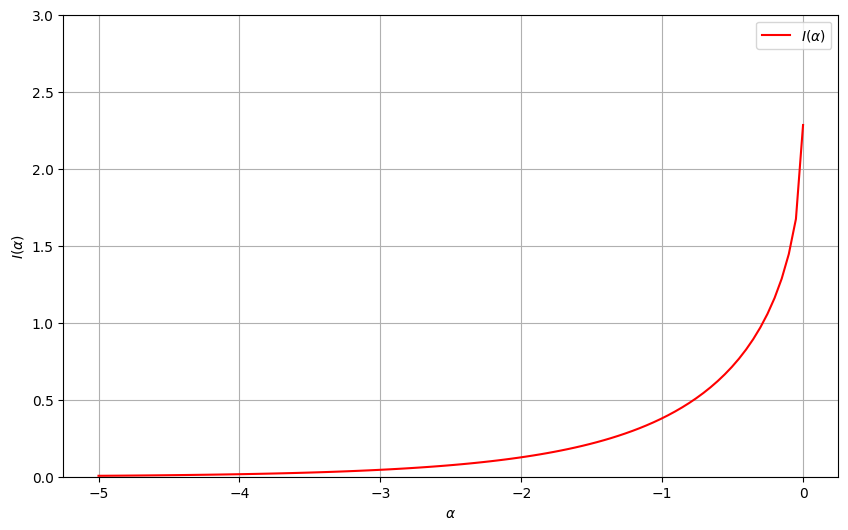

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


hbar = 1.0545718e-34  # Constante de Planck reducida (J·s)
kB = 1.380649e-23     # Constante de Boltzmann (J/K)
m = 1.67e-27          # Masa de una partícula (ejemplo: átomo de hidrógeno, kg)

# Función f(T) de la expresión dada
def f(T):
    return (1 / (2 * np.pi**2 * hbar**3)) * ((2 * m * kB * T)**(3/2)) / 2

# Función para calcular I(alpha) con integración mejorada
def I(alpha):
    if alpha >= 0:
        return np.nan  # Evita problemas de convergencia en alpha >= 0

    def integrand(x, alpha):
        denom = np.exp(x - alpha) - 1
        if denom == 0:
            return 0  # Evita divisiones por cero
        return np.sqrt(x) / denom

    x_mid = 10  # Punto de división del intervalo
    integral1, _ = quad(integrand, 0, x_mid, args=(alpha,), limit=100)
    integral2, _ = quad(integrand, x_mid, np.inf, args=(alpha,), limit=100)

    return integral1 + integral2

# Valores de alpha para comparar en la primera gráfica
alpha_values = [-5, -3, -1]


# Segunda gráfica: I(alpha) vs alpha
alpha_range = np.linspace(-5, -0.0001, 100)  # Se restringe alpha a valores negativos
I_values = [I(alpha) for alpha in alpha_range]

plt.figure(figsize=(10, 6))
plt.plot(alpha_range, I_values, label=r"$I(\alpha)$", color='r')
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$I(\alpha)$")
plt.ylim(0, 3)

plt.legend()
plt.grid()
plt.show()


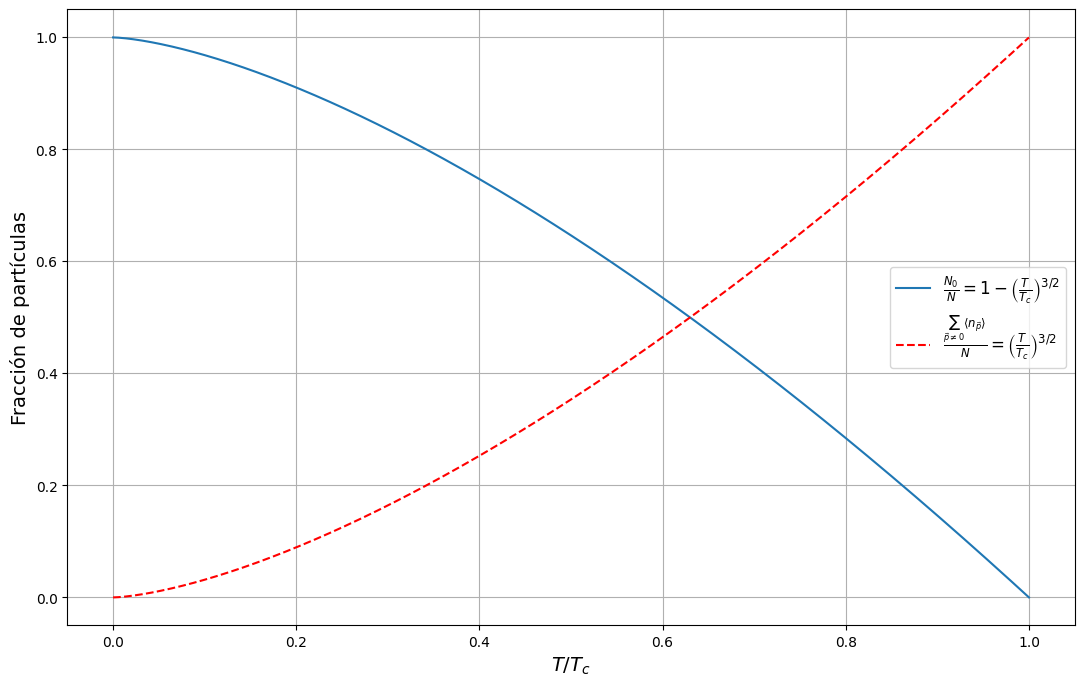

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las funciones
def N0_over_N(T_over_Tc):
    return 1 - (T_over_Tc)**(3/2)

def Nexc_over_N(T_over_Tc):
    return (T_over_Tc)**(3/2)

# Rango de temperaturas normalizadas T/Tc
T_over_Tc = np.linspace(0, 1, 500)

# Calculamos N0/N y Nexc/N
N0_N = N0_over_N(T_over_Tc)
Nexc_N = Nexc_over_N(T_over_Tc)

# Graficamos
plt.figure(figsize=(13, 8))
plt.plot(T_over_Tc, N0_N, label=r'$\frac{N_0}{N} = 1 - \left(\frac{T}{T_c}\right)^{3/2}$')
plt.plot(T_over_Tc, Nexc_N, 'r--', label=r'$\frac{\sum_{\vec{p} \neq 0} \langle n_{\vec{p}} \rangle}{N} = \left(\frac{T}{T_c}\right)^{3/2}$')
plt.xlabel(r'$T / T_c$', fontsize=14)
plt.ylabel(r'Fracción de partículas', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

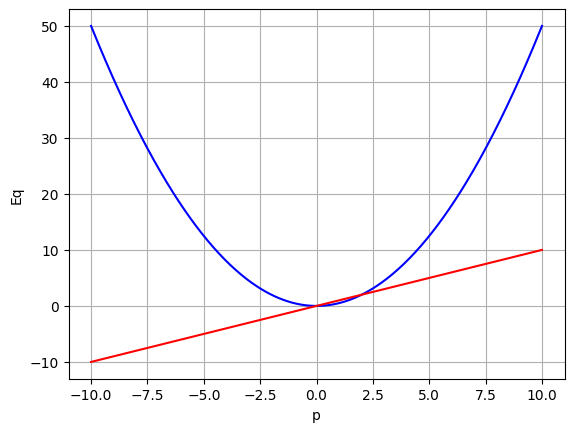

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de m_B y c
m_B = 1  # Ajusta este valor según sea necesario
c = 1    # Ajusta este valor según sea necesario

# Funciones
def F(x):
    return x**2 / (2 * m_B)

def G(x):
    return c * x

# Rango de valores para x
x = np.linspace(-10, 10, 400)

# Graficar las funciones
plt.plot(x, F(x), label='F(x) = x^2 / (2m_B)', color='blue')
plt.plot(x, G(x), label='G(x) = cx', color='red')

# Configurar la gráfica
plt.xlabel('p')
plt.ylabel('Eq')
plt.grid(True)

# Mostrar la gráfica
plt.show()


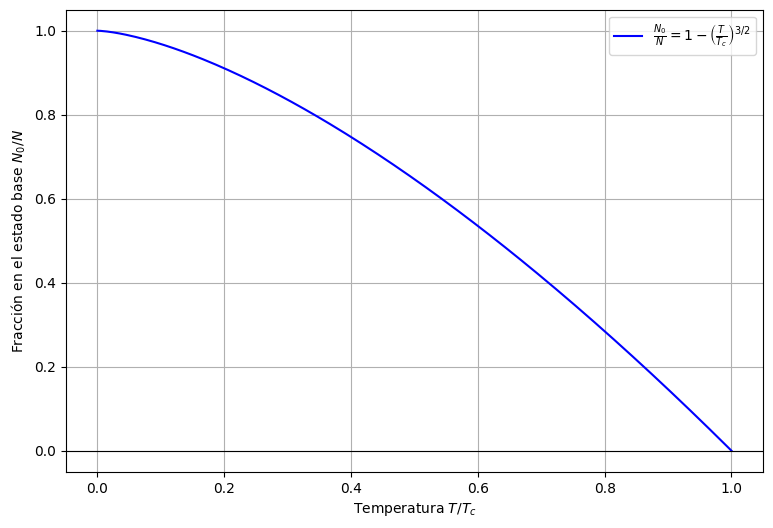

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def N0_N(T, Tc):
    return 1 - (T/Tc)**(3/2)

# Parámetros
Tc = 1.0  # temperatura crítica
T_values = np.linspace(0, Tc, 200)  # T desde 0 hasta Tc
N0_N_values = N0_N(T_values, Tc)

# Crear la gráfica
plt.figure(figsize=(9,6))
plt.plot(T_values, N0_N_values, label=r'$\frac{N_0}{N} = 1 - \left( \frac{T}{T_c} \right)^{3/2}$', color='blue')
plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel(r'Temperatura $T/T_c$')
plt.ylabel(r'Fracción en el estado base $N_0/N$')
plt.legend()
plt.grid(True)
plt.show()
